In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

In [4]:
tanza_data = pd.read_csv("training.csv")
tanza_data.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [5]:
#checking for missing values in the dataset
tanza_data.isnull().sum()


ID                             0
Q1                             0
Q2                             0
Q3                             0
Q4                             0
Q5                             0
Q6                             0
Q7                             0
Q8_1                           0
Q8_2                           0
Q8_3                           0
Q8_4                           0
Q8_5                           0
Q8_6                           0
Q8_7                           0
Q8_8                           0
Q8_9                           0
Q8_10                          0
Q8_11                          0
Q9                             0
Q10                            0
Q11                            0
Q12                            0
Q13                            0
Q14                            0
Q15                            0
Q16                            0
Q17                            0
Q18                            0
Q19                            0
Latitude  

There are no missing values in the dataset in any of the columns in the dataset

In [6]:
gender = tanza_data.groupby("Q2")
gender["Q2"].describe()

,count,mean,std,min,25%,50%,75%,max
Q2,,,,,,,,
1,3122.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,3972.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0


In [ ]:
#mobile_mon.rename(columns={
    'Q1':'Age',
    'Q2':'Gender',
    'Q3':'Marital Status',
    'Q4': 'Education Highest Level',
    'Q5': 'Ownership Of Land',
    'Q6': 'Land Ownership',
    'Q7': 'Mobile phone ownership',
    'Q8_1': 'Salaries/wages',
    'Q8_2':'procured from trading',
    'Q8_3':'procured providing service',
    'Q8_4':'procured casual labour',
    'Q8_5':'procured from rental',
    'Q8_6':'procured money interest',
    'Q8_7':'procured pension',
    'Q8_8':'procured social welfare',
    'Q8_9':'money financially dependant',
    'Q8_10':'money no income',
    'Q9':'salary and wages',
    'Q10':'selling things',
    'Q11':'providing a service',
    'Q12':'send money to another country',
    'Q13':'money last sent',
    'Q14':'received money from another country',
    'Q15':'last money received',
    'Q16':'mobile money purchases',
    'Q17':'mobile money bills',
    'Q18':'literacy in kwiswhahili',
    'Q19':'literacy in english' 
    
})

There are 3122 males that were interviewed
There are 3972 females that were interviewed

In [8]:
#total number of females and males interviewed
male = tanza_data[tanza_data["Q2"] == 1]
female = tanza_data[tanza_data["Q2"] == 2]


**GENDER**

Text(0.5, 1.0, "Comparison of all Males' use of Financial Services")

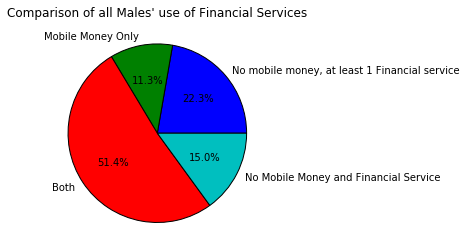

In [12]:
#comparison of males with mobile money and males without mobile money
total_males = len(male[male.mobile_money == 1]) + len(male[male.mobile_money == 0])

l = len(male[male.mobile_money_classification == 1]) / total_males * 100
m = len(male[male.mobile_money_classification == 2]) / total_males * 100
n = len(male[male.mobile_money_classification == 3]) / total_males * 100
o = len(male[male.mobile_money_classification == 0]) / total_males * 100

labels= ['No mobile money, at least 1 Financial service', 'Mobile Money Only', 'Both', 'No Mobile Money and Financial Service']
plt.pie([l, m, n, o], explode=None,autopct='%1.1f%%', labels= labels)
plt.title("Comparison of all Males' use of Financial Services")

Text(0.5, 1.0, "Comparison of all Females' use of financial services")

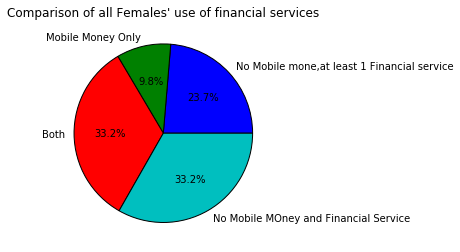

In [13]:
#comparison of females with mobile money and females without mobile money

total_females = len(female[female.mobile_money_classification == 1]) + len(female[female.mobile_money_classification == 2]) + len(female[female.mobile_money_classification == 3])

p = len(female[female.mobile_money_classification == 1]) / total_females * 100
q = len(female[female.mobile_money_classification == 2]) / total_females * 100
r = len(female[female.mobile_money_classification == 3]) / total_females * 100
s = len(female[female.mobile_money_classification == 3]) / total_females * 100
labels= ['No Mobile mone,at least 1 Financial service', 'Mobile Money Only', 'Both', 'No Mobile MOney and Financial Service']
plt.pie([p, q, r, s], explode=None,autopct='%1.1f%%', labels= labels)
plt.title("Comparison of all Females' use of financial services")

**MARITAL STATUSES**

In [10]:
#Seperation of individuals through marital status
married = tanza_data[tanza_data.Q3 == 1]
dirvoced = tanza_data[tanza_data.Q3 == 2]
widowed = tanza_data[tanza_data.Q3 == 3]
single= tanza_data[tanza_data.Q3 == 4]

relation_stat = [married, dirvoced, widowed, single]

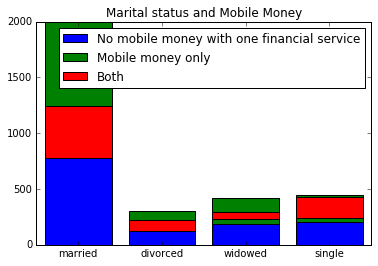

In [11]:
relation_stats_none = []
relation_stats_no_mm = []
#relationship statuses with no mobile money with one financial service
relation_stats_mm = []
#relationship statuses with mobile money only
relation_stats_both = []
#relationship statuses with both
for status in relation_stat:
    relation_stats_no_mm.append(len(status[status.mobile_money_classification == 0]))
    relation_stats_mm.append(len(status[status.mobile_money_classification == 1]))
    relation_stats_both.append(len(status[status.mobile_money_classification == 2]))
#plotting of the graph
plt.bar(np.arange(4), relation_stats_mm, label= 'No mobile money with one financial service')
plt.bar(np.arange(4), relation_stats_no_mm, bottom= relation_stats_mm, label='Mobile money only')
plt.bar(np.arange(4), relation_stats_both, bottom= relation_stats_no_mm, label='Both')
plt.xticks(np.arange(4), ['married', 'divorced', 'widowed', 'single'])
plt.title("Marital status and Mobile Money")
plt.legend(loc="upper right")

In [12]:
relation_stats_none = []
#relation statuses with none
relation_stats_no_mm = []
#relationship statuses with no mobile money with one financial service
relation_stats_mm = []
#relationship statuses with mobile money only
relation_stats_both = []
#relationship statuses with both
for status in relation_stat:
    relation_stats_no_mm.append(len(status[status.mobile_money_classification == 0]))
    relation_stats_mm.append(len(status[status.mobile_money_classification == 1]))
    relation_stats_both.append(len(status[status.mobile_money_classification == 2]))



**TYPES OF INCOME**

In [13]:
#defining the different types of sources of income for Males[male.Q8_8 == 1]
m_wages = male[male.Q8_1 == 1]
m_trading = male[male.Q8_2 == 1]
m_service = male[male.Q8_3 == 1]
m_casual = male[male.Q8_4 == 1]
m_rental = male[male.Q8_5 == 1]
m_interest = male[male.Q8_6 == 1]
m_pension = male[male.Q8_7 == 1]
m_grant = male[male.Q8_8 == 1]
m_handout = male[male.Q8_9 == 1]
m_extpayer = male[male.Q8_10 == 1]


m_sources_of_income = [m_wages, m_trading, m_service, m_casual, m_rental, m_interest, m_pension, m_grant, m_handout, m_extpayer] 


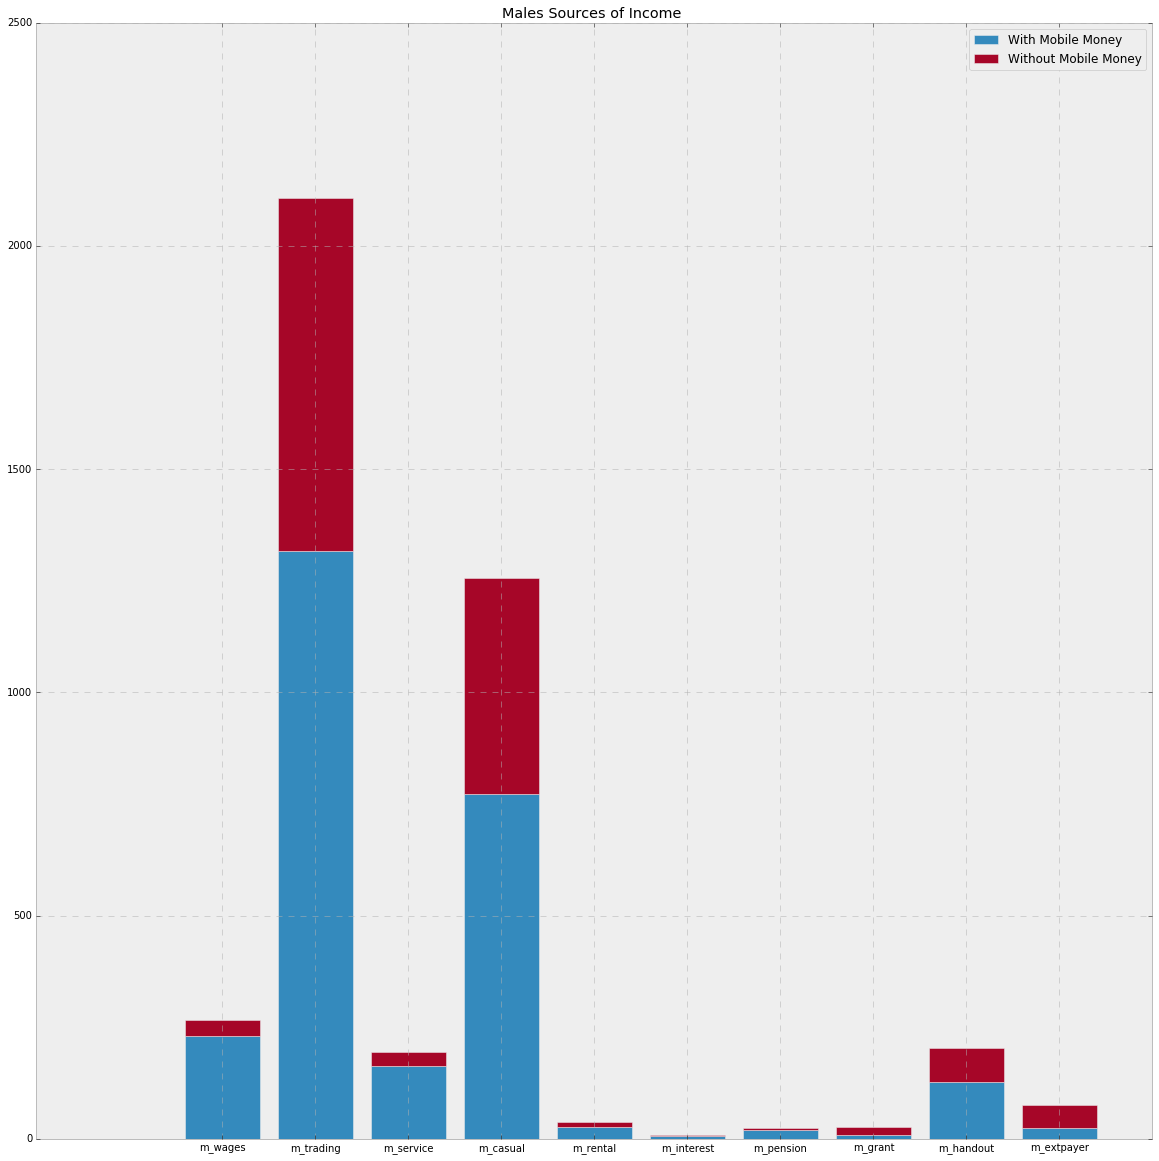

In [14]:
plt.style.use('bmh')
m_sources_mm = []
#Males' souces of income with mobile money
m_sources_no_mm = []
# Males' sources of income without mobile money

for source in m_sources_of_income:
    m_sources_mm.append(len(source[source.mobile_money == 1]))
    m_sources_no_mm.append(len(source[source.mobile_money == 0]))

plt.figure(figsize = (20, 20))
plt.bar(np.arange(10), m_sources_mm, label= 'With Mobile Money')
plt.bar(np.arange(10), m_sources_no_mm, bottom= m_sources_mm, label='Without Mobile Money')
plt.xticks(np.arange(10), ['m_wages', 'm_trading', 'm_service', 'm_casual', 'm_rental', 'm_interest', 'm_pension', 'm_grant','m_handout', 'm_extpayer'])
plt.title("Males Sources of Income ")
plt.legend(loc="upper right")

**WOMEN TYPES OF INCOME**

In [15]:
#defining the different types of sources of income for Females
fm_wages = female[female.Q8_1 == 1]
fm_trading = female[female.Q8_2 == 1]
fm_service = female[female.Q8_3 == 1]
fm_casual = female[female.Q8_4 == 1]
fm_rental = female[female.Q8_5 == 1]
fm_interest = female[female.Q8_6 == 1]
fm_pension = female[female.Q8_7 == 1]
fm_grant = female[female.Q8_8 == 1]
fm_handout = female[female.Q8_9 == 1]
fm_extpayer = female[female.Q8_10 == 1]


fm_sources_of_income = [m_wages, m_trading, m_service, m_casual, m_rental, m_interest, m_pension, m_grant, m_handout, m_extpayer] 


In [16]:
#reationship statuses without mobile money
#defining the different types of sources of income for Males[male.Q8_8 == 1]
m_wages = male[male.Q8_1 == 1]
m_trading = male[male.Q8_2 == 1]
m_service = male[male.Q8_3 == 1]
m_casual = male[male.Q8_4 == 1]
m_rental = male[male.Q8_5 == 1]
m_interest = male[male.Q8_6 == 1]
m_pension = male[male.Q8_7 == 1]
m_grant = male[male.Q8_8 == 1]
m_handout = male[male.Q8_9 == 1]
m_extpayer = male[male.Q8_10 == 1]


m_sources_of_income = [m_wages, m_trading, m_service, m_casual, m_rental, m_interest, m_pension, m_grant, m_handout, m_extpayer] 


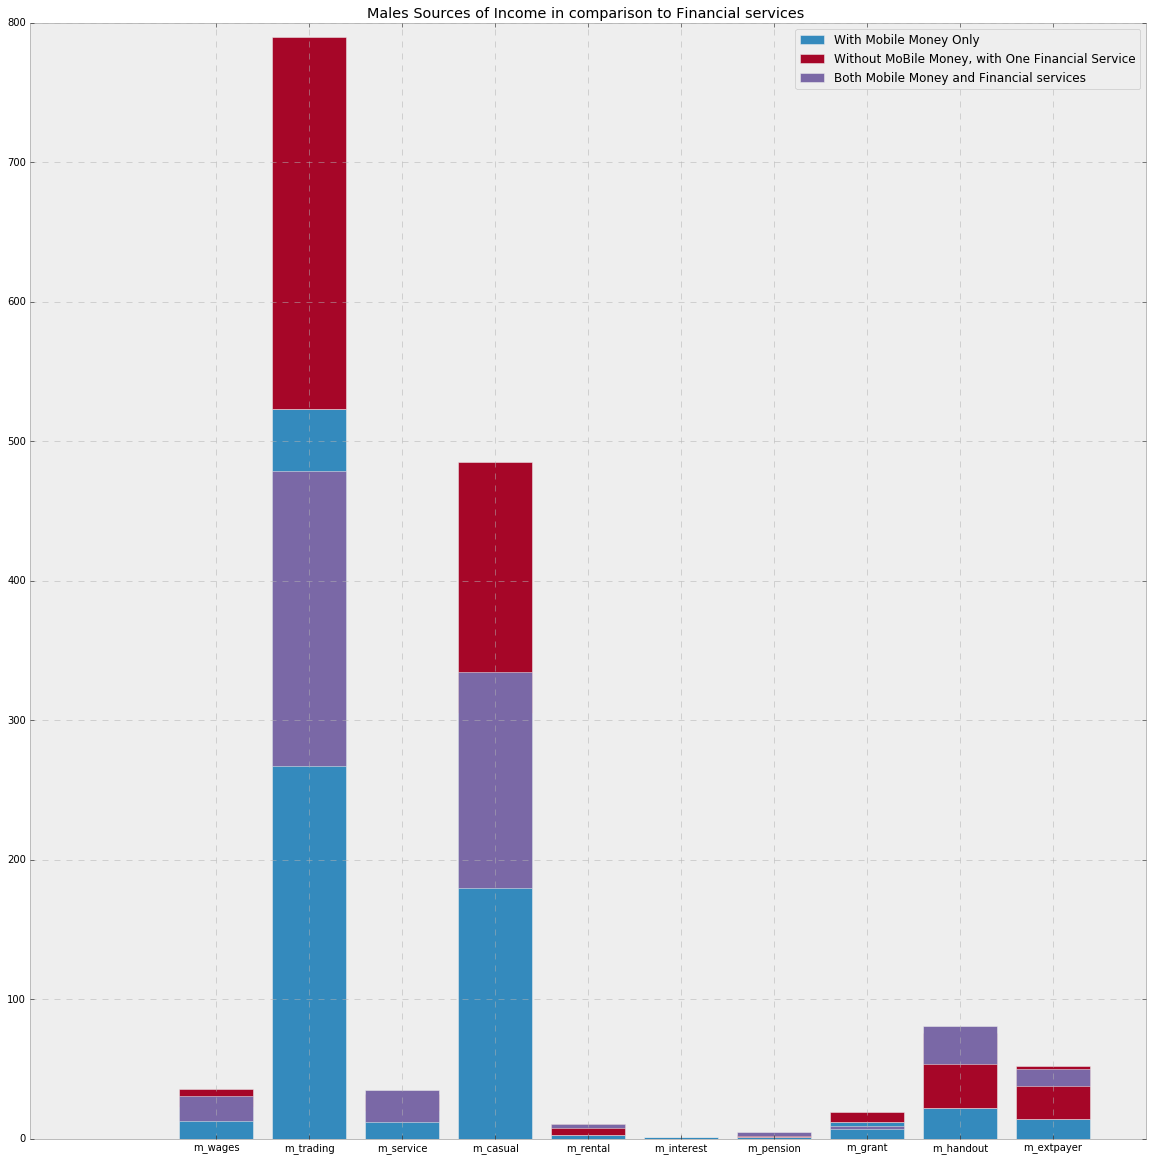

In [17]:
plt.style.use('bmh')
m_sources_mm = []
#Males' souces of income with mobile money only
m_sources_no_mm = []
# Males' sources of income without mobile money but at least one other finacial service
m_sources_both = []
# Males' sources of income with both
for source in m_sources_of_income:
    m_sources_mm.append(len(source[source.mobile_money_classification == 1]))
    m_sources_no_mm.append(len(source[source.mobile_money_classification == 0]))
    m_sources_both.append(len(source[source.mobile_money_classification == 2]))
    
plt.figure(figsize = (20, 20))
plt.bar(np.arange(10), m_sources_mm, label= 'With Mobile Money Only')
plt.bar(np.arange(10), m_sources_no_mm, bottom= m_sources_mm, label='Without MoBile Money, with One Financial Service')
plt.bar(np.arange(10),m_sources_both, bottom=m_sources_no_mm, label='Both Mobile Money and Financial services')
plt.xticks(np.arange(10), ['m_wages', 'm_trading', 'm_service', 'm_casual', 'm_rental', 'm_interest', 'm_pension', 'm_grant','m_handout', 'm_extpayer'])
plt.title("Males Sources of Income in comparison to Financial services ")
plt.legend(loc="upper right")


**FEMALES COMPARISON TO MOBILE CLASSIFICATION**

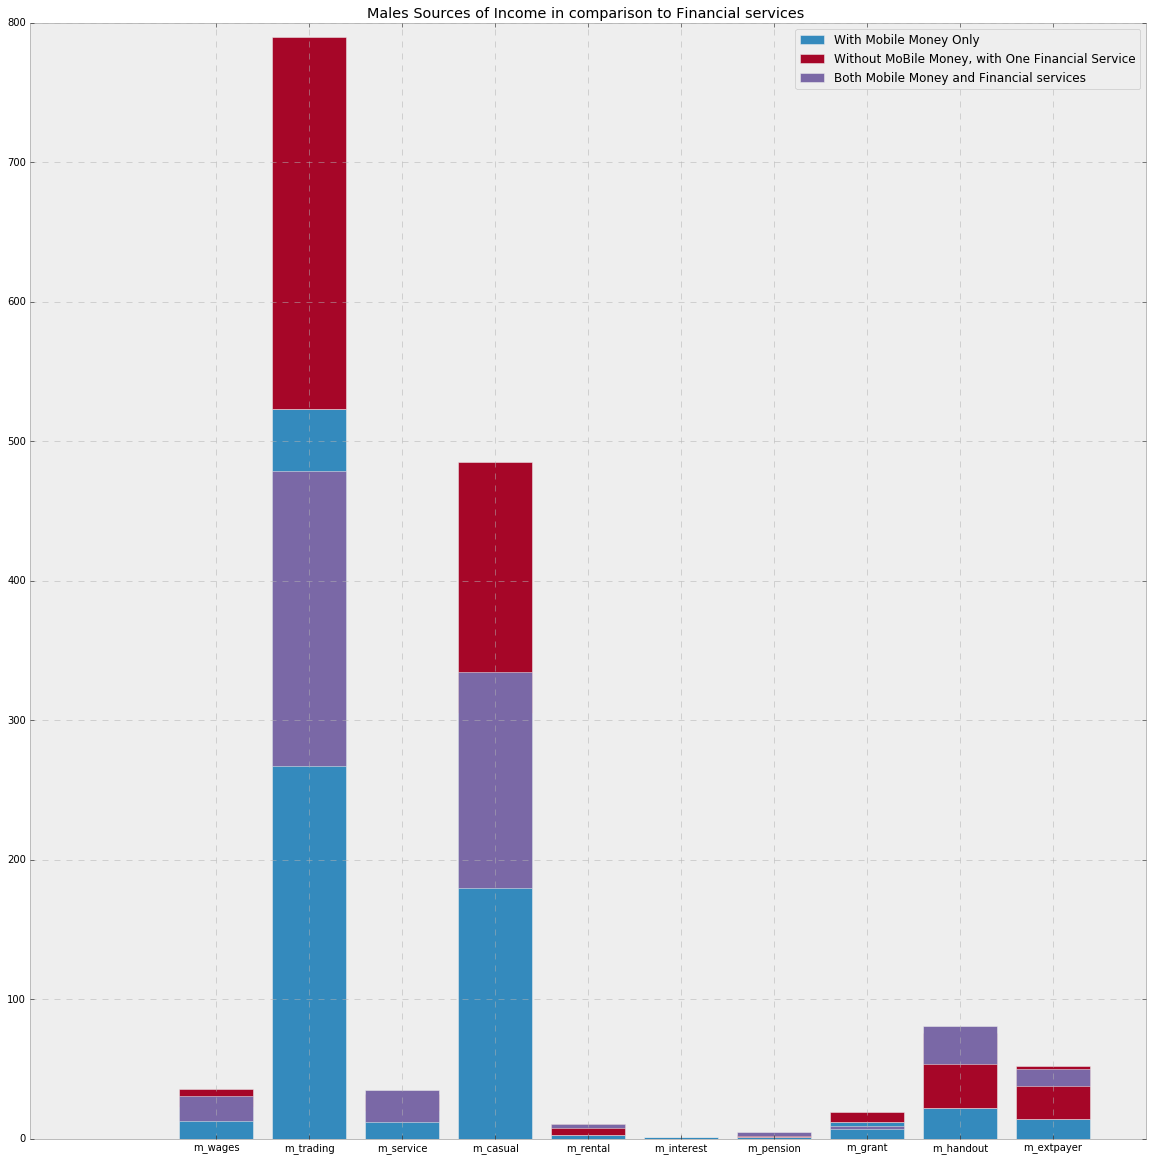

In [18]:
plt.style.use('bmh')
fm_sources_mm = []
#Males' souces of income with mobile money only
fm_sources_no_mm = []
# Males' sources of income without mobile money but at least one other finacial service
fm_sources_both = []
# Males' sources of income with both
for source in m_sources_of_income:
    fm_sources_mm.append(len(source[source.mobile_money_classification == 1]))
    fm_sources_no_mm.append(len(source[source.mobile_money_classification == 0]))
    fm_sources_both.append(len(source[source.mobile_money_classification == 2]))
    
plt.figure(figsize = (20, 20))
plt.bar(np.arange(10), fm_sources_mm, label= 'With Mobile Money Only')
plt.bar(np.arange(10), fm_sources_no_mm, bottom= fm_sources_mm, label='Without MoBile Money, with One Financial Service')
plt.bar(np.arange(10), fm_sources_both, bottom=fm_sources_no_mm, label='Both Mobile Money and Financial services')
plt.xticks(np.arange(10), ['m_wages', 'm_trading', 'm_service', 'm_casual', 'm_rental', 'm_interest', 'm_pension', 'm_grant','m_handout', 'm_extpayer'])
plt.title("Males Sources of Income in comparison to Financial services ")
plt.legend(loc="upper right")


**AGE**

Text(0.5, 1, 'Age in Comparison to Mobile money Classification')

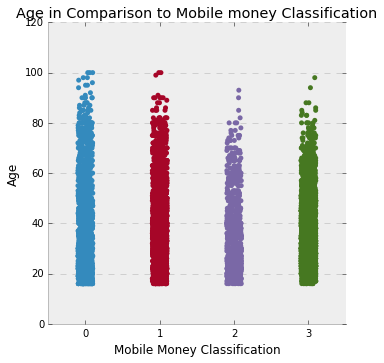

In [19]:

sns.catplot(x= 'mobile_money_classification', y='Q1', data= tanza_data)
plt.xlabel("Mobile Money Classification")
plt.ylabel("Age")
plt.title('Age in Comparison to Mobile money Classification')

**ppropriate graphs to visually represent the relationship between how often mobile services are used and age, gender, marital status, land ownership and type of income.



In [20]:
#Q16 and Q17 deal with how often interviwees used mobile money in the past 
# definig the categories to how ofteen its been ued for the past 12 months

#not_app = tanza_data[tanza_data.Q16 == -1] + tanza_data[tanza_data.Q.17]
#not_app


In [21]:
freq_of_use = tanza_data.groupby("Q16")
freq_of_use["Q16"].describe()



,count,mean,std,min,25%,50%,75%,max
Q16,,,,,,,,
1,5089.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,77.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
3,248.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
4,543.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0
5,1137.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0


In [35]:
freq_of_use1 = tanza_data.groupby("Q17")
freq_of_use1.describe()

TypeError: object of type 'bool' has no len()

Text(0.5, 1, 'Age in Comparison to Mobile money Classification')

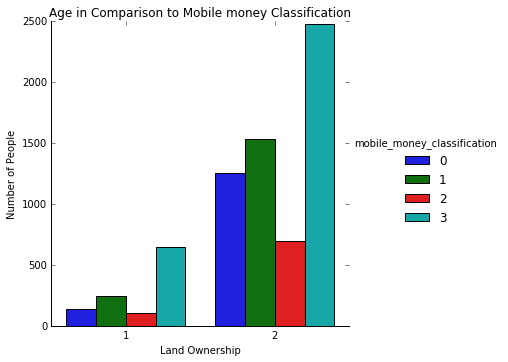

In [18]:
#Land Ownership

sns.catplot(x= 'Q6',kind= 'count', hue= 'mobile_money_classification', data= tanza_data)
plt.xlabel("Land Ownership")
plt.ylabel('Number of People')
plt.title('Age in Comparison to Mobile money Classification')

In [53]:
#defining totals of frequency 

m_never = len(tanza_data[tanza_data["Q16"] == 1])+ len(tanza_data[tanza_data["Q17"] == 1])
daily = len(tanza_data[tanza_data["Q16"] == 2])+ len(tanza_data[tanza_data["Q17"] == 2])
weekly = len(tanza_data[tanza_data["Q16"] == 3]) + len(tanza_data[tanza_data["Q17"] == 3])
monthly = len(tanza_data[tanza_data["Q16"] == 4]) + len(tanza_data[tanza_data["Q17"] == 4])
not_often = len(tanza_data[tanza_data["Q16"] == 5]) + len(tanza_data[tanza_data["Q17"] == 5])

total = [never, daily, weekly, monthly, not_often]


2255

In [ ]:
#defining how 
males_freq = tanza_data[tanza_data["Q2"] == 1]

m_never = len(males_freq[males_freq["Q16"] == 1])+ len(males_freq[males["Q17"] == 1])
daily = len(males_freq[males_freq["Q16"] == 2])+ len(males_freq[males_freq["Q17"] == 2])
weekly = len(males_freq[males_freq["Q16"] == 3]) + len(males_freq[tanza_data["Q17"] == 3])
monthly = len(males_freq[males_freq["Q16"] == 4]) + len(males_freq[males_freq["Q17"] == 4])
not_often = len(males_freq[males_freq["Q16"] == 5]) + len(males_freq[males_freq["Q17"] == 5])

total_m = [never, daily, weekly, monthly, not_often]
m_never




In [ ]:
#defining frequency of usage amoungst females 
females_freq = tanza_data[tanza_data["Q2"] == 2]

m_never = len(females_freq[females_freq["Q16"] == 1])+ len(females_freq[males["Q17"] == 1])
daily = len(females_freq[females_freq["Q16"] == 2])+ len(females_freq[males_freq["Q17"] == 2])
weekly = len(females_freq[females_freq["Q16"] == 3]) + len(females_freq[tanza_data["Q17"] == 3])
monthly = len(females_freq[females_freq["Q16"] == 4]) + len(females_freq[males_freq["Q17"] == 4])
not_often = len(females_freq[females_freq["Q16"] == 5]) + len(females_freq[females_freq["Q17"] == 5])
n_a = len(females_freq[females_freq["Q16"] == 5]) + len(females_freq[females_freq["Q17"] == 5]) 


total_fm = [never, daily, weekly, monthly, not_often]





In [ ]:
sns.countplot(, hue='gender', data=financials)